# Wildfires Prediction using Logistic Regression

### Author: Sirine Maàroufi

## Importing neccessary libraries

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk

## Reading the data

In [3]:
Wildfires_data = pd.read_table ('Wildfires_pred_Dataset.txt',sep=',')


In [4]:
Wildfires_data

,NDVI,LST,BURNED_AREA,CLASS
0,0.506782,14584.272727,4.692308,no_fire
1,0.522150,14655.833333,5.000000,no_fire
2,0.682284,14780.000000,5.000000,fire
3,0.120046,13298.500000,3.500000,no_fire
4,0.568734,14743.000000,5.000000,no_fire
...,...,...,...,...
1708,0.621721,14406.000000,5.000000,no_fire
1709,0.709715,14330.400000,4.851852,no_fire
1710,0.613000,14751.500000,3.000000,fire
1711,0.614471,13611.000000,4.921053,no_fire


## Exploring the data

In [5]:
Wildfires_data.head()


,NDVI,LST,BURNED_AREA,CLASS
0,0.506782,14584.272727,4.692308,no_fire
1,0.522150,14655.833333,5.000000,no_fire
2,0.682284,14780.000000,5.000000,fire
3,0.120046,13298.500000,3.500000,no_fire
4,0.568734,14743.000000,5.000000,no_fire


In [6]:
Wildfires_data.tail()

,NDVI,LST,BURNED_AREA,CLASS
1708,0.621721,14406.000000,5.000000,no_fire
1709,0.709715,14330.400000,4.851852,no_fire
1710,0.613000,14751.500000,3.000000,fire
1711,0.614471,13611.000000,4.921053,no_fire
1712,0.549497,14269.777778,5.000000,fire


In [7]:
Wildfires_data.columns

Index(['NDVI', 'LST', 'BURNED_AREA', 'CLASS'], dtype='object')

In [8]:
Wildfires_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1713 entries, 0 to 1712
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   NDVI         1713 non-null   float64
 1   LST          1713 non-null   float64
 2   BURNED_AREA  1713 non-null   float64
 3   CLASS        1713 non-null   object 
dtypes: float64(3), object(1)
memory usage: 53.7+ KB


In [9]:
Wildfires_data.shape


(1713, 4)

In [10]:
Wildfires_data.describe()


,NDVI,LST,BURNED_AREA
count,1713.000000,1713.000000,1713.000000
mean,0.555665,14622.802073,4.674973
std,0.092847,366.927861,0.583791
min,0.030735,13137.000000,3.000000
25%,0.501276,14406.000000,4.521951
50%,0.565181,14645.750000,4.920635
75%,0.620987,14881.300000,5.000000
max,0.781723,15611.570513,9.000000


## Data Preprocessing

In [6]:
y1= Wildfires_data.CLASS

# add a new column to the dataset (0 ~~ no_fire , 1 ~~ fire)
# I'm using 'Binary_CLASS' as column name

"Computing the new column"

Binary_class=pd.Series(1713,)

for i in range(1713):
    if y1[i]== 'fire':
        Binary_class[i]= 1
    else:
        Binary_class[i]= 0

# adding the new series to the dataframe as column

Wildfires_data['Binary_CLASS'] = Binary_class




In [7]:
Wildfires_data.shape


(1713, 5)

In [14]:
Wildfires_data.head()


,NDVI,LST,BURNED_AREA,CLASS,Binary_CLASS
0,0.506782,14584.272727,4.692308,no_fire,0
1,0.522150,14655.833333,5.000000,no_fire,0
2,0.682284,14780.000000,5.000000,fire,1
3,0.120046,13298.500000,3.500000,no_fire,0
4,0.568734,14743.000000,5.000000,no_fire,0


In [15]:
Wildfires_data.describe()

,NDVI,LST,BURNED_AREA,Binary_CLASS
count,1713.000000,1713.000000,1713.000000,1713.000000
mean,0.555665,14622.802073,4.674973,0.225336
std,0.092847,366.927861,0.583791,0.417925
min,0.030735,13137.000000,3.000000,0.000000
25%,0.501276,14406.000000,4.521951,0.000000
50%,0.565181,14645.750000,4.920635,0.000000
75%,0.620987,14881.300000,5.000000,0.000000
max,0.781723,15611.570513,9.000000,1.000000


## Choose target and features


In [8]:

Y = Wildfires_data.Binary_CLASS

wildfires_features = ['NDVI','LST','BURNED_AREA']
X=Wildfires_data[wildfires_features]


In [17]:
X.head()

,NDVI,LST,BURNED_AREA
0,0.506782,14584.272727,4.692308
1,0.522150,14655.833333,5.000000
2,0.682284,14780.000000,5.000000
3,0.120046,13298.500000,3.500000
4,0.568734,14743.000000,5.000000


## Feature Scaling : Standardization

In [9]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler().fit(X)
standard_X=scaler.transform(X)


# Balancing The Data

In [10]:
print(Y.value_counts())
#The dataset is imbalanced

0    1327
1     386
Name: Binary_CLASS, dtype: int64


In [11]:
from imblearn.over_sampling import SMOTE

balanced_data=  SMOTE(sampling_strategy='auto',
                      k_neighbors=1, 
                      random_state=100)

X_balanced,y_balanced=balanced_data.fit_resample(standard_X,Y)

In [12]:
print(y_balanced.value_counts())


0    1327
1    1327
Name: Binary_CLASS, dtype: int64


## Visualizing the data

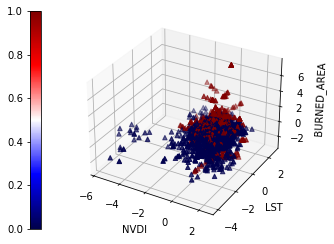

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


x = X_balanced[:,0]
y = X_balanced[:,1]
z = X_balanced[:,2]
c=y_balanced

img = ax.scatter(x, y, z, c=c, cmap='seismic',marker='^')
fig.colorbar(img,location='left')
ax.set( xlabel='NVDI', ylabel ='LST',
     zlabel='BURNED_AREA')
plt.show()


## Spliting the data to training examples and testing examples

In [14]:
from sklearn.model_selection import train_test_split

X_train ,X_test ,y_train ,y_test = train_test_split (X_balanced ,
                                                     y_balanced ,
                                                     random_state=0)



## Model Training

In [15]:
from sklearn.linear_model import LogisticRegression

log_fire_classifier = LogisticRegression()

log_fire_classifier.fit(X_train,y_train)

LogisticRegression()

## Prediction

In [16]:
y_pred_train=log_fire_classifier.predict(X_train)
y_pred_test=log_fire_classifier.predict(X_test)


## Accuracy

In [17]:
from sklearn.metrics import accuracy_score

print("Training Accuracy :\n",accuracy_score(y_train, y_pred_train)*100)
print("Testing Accuracy :\n",accuracy_score(y_test, y_pred_test)*100)

Training Accuracy :
 66.13065326633166
Testing Accuracy :
 65.06024096385542


In [18]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred_test))


              precision    recall  f1-score   support

           0       0.64      0.68      0.66       329
           1       0.67      0.62      0.64       335

    accuracy                           0.65       664
   macro avg       0.65      0.65      0.65       664
weighted avg       0.65      0.65      0.65       664

